# Выпускная квалификационная работа - 5 Написать нейронную сеть

1. Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

In [18]:
import warnings; warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential      # последовательная модель
from tensorflow.keras.models import load_model
from tensorflow.keras        import layers
from tensorflow.keras.layers import Dense           # полносвязный слой
from tensorflow.keras.layers import Dropout


## Загрузка данных

In [19]:
df = pd.read_excel('data/data_outliers_cleaned.xlsx', index_col=0)
df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [20]:
df.shape

(936, 13)

In [21]:
# Определим входы и выход для модели

target_var = df['Соотношение матрица-наполнитель']
train_vars = df.loc[:, df.columns != 'Соотношение матрица-наполнитель']

# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(train_vars, target_var, test_size=0.3, random_state=14)

In [22]:
# нормализация
# This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1.
#  It enables smoother gradients, faster training, and better generalization accuracy.
x_train_normalizer = tf.keras.layers.Normalization(axis=-1)
x_train_normalizer.adapt(np.array(x_train))

In [23]:
# Сконфигурируем модель, зададим слои
# In regression models, ‘relu’ is generally used in the hidden layers, 
# and ‘linear’ activation functions are used in the output layer, 
# if the regression is not logistic.

model = tf.keras.Sequential([
    x_train_normalizer, 
    
    layers.Dense((x_train.shape[1] * 16), activation='relu', name='Hidden-1'), 
    # layers.Dropout(0.2, input_shape=(2,), name='Dropout-1-.2'),
    layers.Dense((x_train.shape[1] * 4), activation='relu', name='Hidden-2'), 
    # layers.Dropout(0.2, input_shape=(2,), name='Dropout-2-.2'),
    layers.Dense(1, activation='linear', name='Output'),                                                  
])

#  The ‘mse’ loss function is usually in regression models.
# model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')
model.compile(optimizer='rmsprop' , loss='mean_squared_error' , metrics=['mae'])

In [24]:
# Архитектура модели

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 Hidden-1 (Dense)            (None, 192)               2496      
                                                                 
 Hidden-2 (Dense)            (None, 48)                9264      
                                                                 
 Output (Dense)              (None, 1)                 49        
                                                                 
Total params: 11,834
Trainable params: 11,809
Non-trainable params: 25
_________________________________________________________________


In [25]:
# Обучим модель

model_hist = model.fit(x_train, y_train, epochs=10, verbose=2, validation_split = 0.3)

Epoch 1/10
15/15 - 0s - loss: 3.8377 - mae: 1.6247 - val_loss: 1.3928 - val_mae: 0.9235 - 428ms/epoch - 29ms/step
Epoch 2/10
15/15 - 0s - loss: 1.0753 - mae: 0.8362 - val_loss: 1.1542 - val_mae: 0.8657 - 47ms/epoch - 3ms/step
Epoch 3/10
15/15 - 0s - loss: 0.9458 - mae: 0.7916 - val_loss: 1.1563 - val_mae: 0.8820 - 37ms/epoch - 2ms/step
Epoch 4/10
15/15 - 0s - loss: 0.8947 - mae: 0.7668 - val_loss: 1.1399 - val_mae: 0.8792 - 32ms/epoch - 2ms/step
Epoch 5/10
15/15 - 0s - loss: 0.8505 - mae: 0.7485 - val_loss: 1.1161 - val_mae: 0.8595 - 32ms/epoch - 2ms/step
Epoch 6/10
15/15 - 0s - loss: 0.7993 - mae: 0.7251 - val_loss: 1.1079 - val_mae: 0.8694 - 33ms/epoch - 2ms/step
Epoch 7/10
15/15 - 0s - loss: 0.7503 - mae: 0.7056 - val_loss: 1.1602 - val_mae: 0.8758 - 34ms/epoch - 2ms/step
Epoch 8/10
15/15 - 0s - loss: 0.7187 - mae: 0.6914 - val_loss: 1.0895 - val_mae: 0.8692 - 32ms/epoch - 2ms/step
Epoch 9/10
15/15 - 0s - loss: 0.6947 - mae: 0.6774 - val_loss: 1.0878 - val_mae: 0.8681 - 52ms/epoch -

In [26]:
# Потери модели

model_hist.history

{'loss': [3.837712526321411,
  1.0753158330917358,
  0.9458215832710266,
  0.8947401642799377,
  0.8504533171653748,
  0.7992616295814514,
  0.7503341436386108,
  0.7187413573265076,
  0.6946560144424438,
  0.6472176909446716],
 'mae': [1.6247485876083374,
  0.8362070918083191,
  0.7916383743286133,
  0.7667898535728455,
  0.7485340237617493,
  0.7250999808311462,
  0.7055878639221191,
  0.6914408206939697,
  0.6773958206176758,
  0.6517592668533325],
 'val_loss': [1.392808198928833,
  1.1541557312011719,
  1.1563242673873901,
  1.1399222612380981,
  1.1160593032836914,
  1.1079124212265015,
  1.1601979732513428,
  1.0895330905914307,
  1.0877728462219238,
  1.0915898084640503],
 'val_mae': [0.9235053658485413,
  0.8657306432723999,
  0.8819938898086548,
  0.879237711429596,
  0.8594520092010498,
  0.8694143295288086,
  0.8757791519165039,
  0.8691719770431519,
  0.8681116104125977,
  0.8697719573974609]}

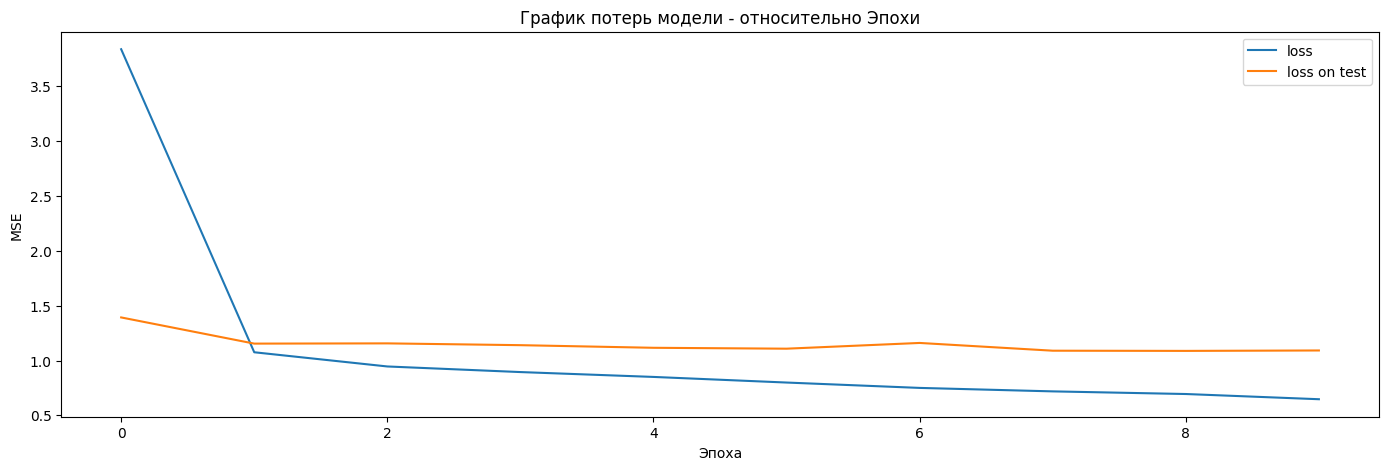

In [27]:
# Отрисовка потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist):
    plt.figure(figsize=(17,5))
    plt.plot(model_hist.history['loss'])
    plt.plot(model_hist.history['val_loss'])
    plt.title('График потерь модели - относительно Эпохи')
    plt.ylabel('MSE')
    plt.xlabel('Эпоха')
    plt.legend(['loss', 'loss on test'], loc='best')
    plt.show()
model_loss_plot(model_hist)

In [28]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей

def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label='Тест')
    plt.plot(predict, label='Прогноз')
    plt.legend(loc='best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()


9/9 [==============================] - 0s 971us/step


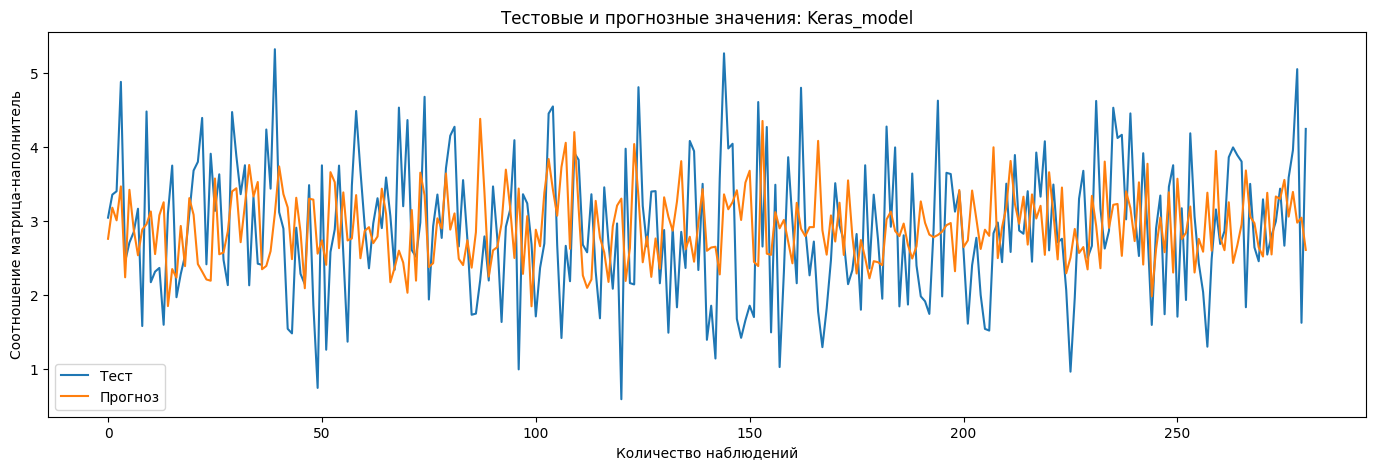

In [29]:
# Отрисуем результат работы модели

actual_and_predicted_plot(y_test.values, model.predict(x_test.values), 'Соотношение матрица-наполнитель', 'Keras_model')

In [30]:
# оценка модели MSE
mse_nn, mae_nn = model.evaluate(x_test, y_test, verbose=1)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

9/9 [==============================] - 0s 855us/step - loss: 1.0611 - mae: 0.8514
Mean squared error on test data:  1.0611428022384644
Mean absolute error on test data:  0.851414680480957


In [31]:
print(F'MSE: {mean_squared_error(y_test, model.predict(x_test.values)):.4f} , R2: {r2_score(y_test, model.predict(x_test.values)):.4f}')

9/9 [==============================] - 0s 668us/step
MSE: 1.0611 , R2: -0.2619


In [32]:
model.save('model/my_keras_model')

INFO:tensorflow:Assets written to: model/my_keras_model/assets


INFO:tensorflow:Assets written to: model/my_keras_model/assets


In [33]:

m = load_model('model/my_keras_model')
m.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 Hidden-1 (Dense)            (None, 192)               2496      
                                                                 
 Hidden-2 (Dense)            (None, 48)                9264      
                                                                 
 Output (Dense)              (None, 1)                 49        
                                                                 
Total params: 11,834
Trainable params: 11,809
Non-trainable params: 25
_________________________________________________________________


In [34]:
m.weights

[<tf.Variable 'mean:0' shape=(12,) dtype=float32, numpy=
 array([1973.0605   ,  741.70575  ,  111.28362  ,   22.206017 ,
         286.04895  ,  490.849    ,   73.33168  , 2470.2708   ,
         215.27907  ,   45.755722 ,    6.8643894,   57.48952  ],
       dtype=float32)>,
 <tf.Variable 'variance:0' shape=(12,) dtype=float32, numpy=
 array([5.0779165e+03, 1.0743080e+05, 7.4003314e+02, 6.0251102e+00,
        1.5916606e+03, 7.9864117e+04, 9.3165226e+00, 2.2316891e+05,
        3.5265742e+03, 2.0244287e+03, 6.1740403e+00, 1.2727345e+02],
       dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=655>,
 <tf.Variable 'Hidden-1/kernel:0' shape=(12, 192) dtype=float32, numpy=
 array([[ 0.0134623 ,  0.00578241,  0.10007259, ..., -0.10787307,
         -0.1083824 , -0.09056784],
        [ 0.12828039, -0.14618468,  0.15441099, ...,  0.00324299,
         -0.14206912,  0.01327733],
        [-0.16433895, -0.13739051,  0.05933473, ..., -0.09979863,
          0.08461004, -0.06891633],
